## PCA와 k-means로 얼굴사진 보기

### PCA와 k-means
<pre>
k-means는 군집 알고리즘이다.
PCA는 데이터에서 분산이 가장 큰 방향을 찾으려 한다.
k-means(k평균)은 클러스터의 중심으로 각 데이터 포인터를 표현한다.
</pre>

### 벡터 양자화(vector quantization)
<pre>
(가) k-means(k-평균)을 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 벡터 양자화(vector quantization)이라 한다.
(나) 연속적으로 샘플링된 진폭값들을 그룹핑하여 이 그룹 단위를 몇개의 대표값으로 양자화
-> 일련의 표본들을 특성화시킨 몇개의 대표값(n-tuple, 순서쌍)으로 양자화
-> 연속 샘플링된 데이터들이 강한 시간 상관성(Temporal Correlaton)을 갖을 때 유리하다.
</pre>

### 벡터 양자화 장단점
<pre>
단점 : 압축률이 클 경우, 화질/음질 등의 급격한 저하 수반.    
장점 : 구조가 단순, 압축률이 높다. 
</pre>
http://www.ktword.co.kr/abbr_view.php?m_temp1=2870

In [20]:
## 준비
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

## PCA, k-means의 비교

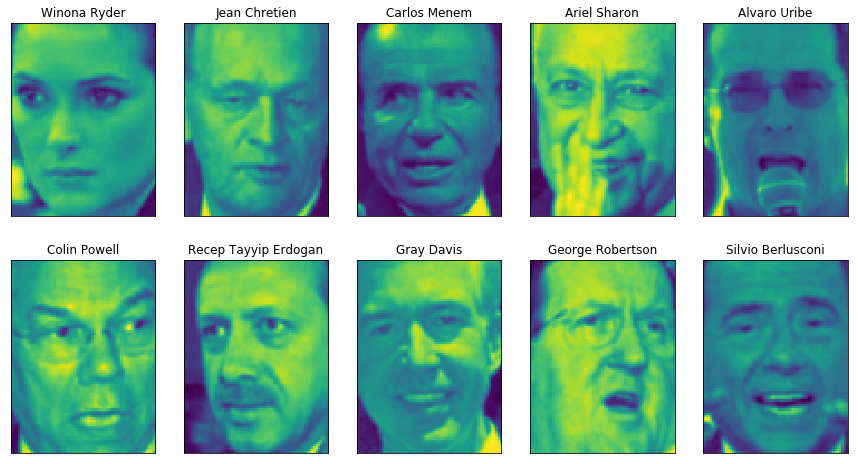

In [13]:
from sklearn.datasets  import  fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize=(15,8),
                         subplot_kw={'xticks':(),
                                     'yticks':() })

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

### 데이터 셋 나누기

In [14]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정한다.
# MinMaxScaler를 적용하는 것과 같음.
X_people = X_people / 255

### 알고리즘을 이용, 주성분 100개, 클러스터 100개 생성

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
        X_people, y_people, 
        stratify=y_people, 
        random_state=0)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
# 평가용 데이터 이용 재구성.
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

### 그래프 표시

In [33]:
print(image_shape)
print(comp_kmeans.shape)  # kmeans의 성분  87 x 65
print(comp_kmeans)  # kmeans의 성분

print(X_reconstructed_pca.shape)    # (516, 5655) - 516은 test의 데이터 셋 개수 
print(X_reconstructed_pca[1:5])     # 재구성 데이터 보기(5개만)

print(X_reconstructed_kmeans.shape) # (516, 5655)
print(X_reconstructed_kmeans[1:5])  # 재구성 데이터 보기(5개만)

(87, 65)
(5655,)
[ 0.20588234  0.21385619  0.22176471 ...,  0.36797386  0.34359479
  0.33058825]
(516, 5655)
[[ 0.02759063  0.02142051  0.02602262 ...,  0.65075536  0.65792488
   0.66485869]
 [ 0.10648586  0.11307174  0.12278078 ...,  0.61638533  0.63279427
   0.6169848 ]
 [ 0.11273422  0.10823138  0.11187842 ...,  0.22161408  0.28496008
   0.340053  ]
 [ 0.11651091  0.13147418  0.14892901 ...,  0.24060353  0.27228629
   0.29430579]]
(516, 5655)
[[ 0.20623887  0.21871659  0.2265003  ...,  0.46833035  0.4446227
   0.43933451]
 [ 0.2640523   0.27184874  0.28972921 ...,  0.488282    0.44897291
   0.43193278]
 [ 0.20281045  0.21124181  0.22718954 ...,  0.54588234  0.54333335
   0.53869283]
 [ 0.2427451   0.27163398  0.33150327 ...,  0.40823528  0.3867974
   0.36745098]]


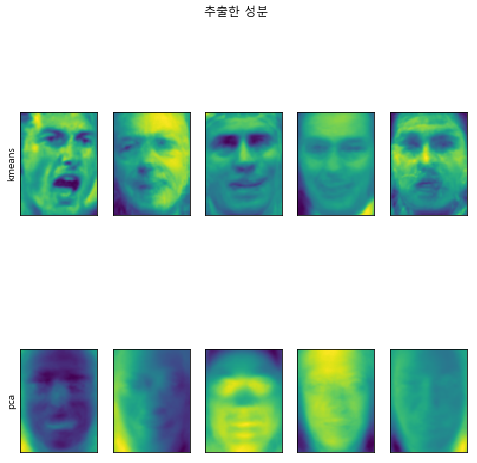

In [21]:
fig, axes =  plt.subplots(2,5, figsize=(8,8),
                         subplot_kw={'xticks':(), 'yticks':()})

fig.suptitle("추출한 성분")

for ax, comp_kmeans, comp_pca in zip(
    axes.T, kmeans.cluster_centers_, pca.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    
axes[0,0].set_ylabel('kmeans')
axes[1,0].set_ylabel('pca')

### pca와 k-means에서 추출한 성분으로 세트의 얼굴을 재구성한 것을 비교
<pre>
가. k-means 을 사용한 벡터 양자화의 흥미로운 면은 입력 데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있다.
나. PCA등은 차원을 1차원으로 축소하면 이 데이터의 구조가 완전히 파괴된다.
</pre>

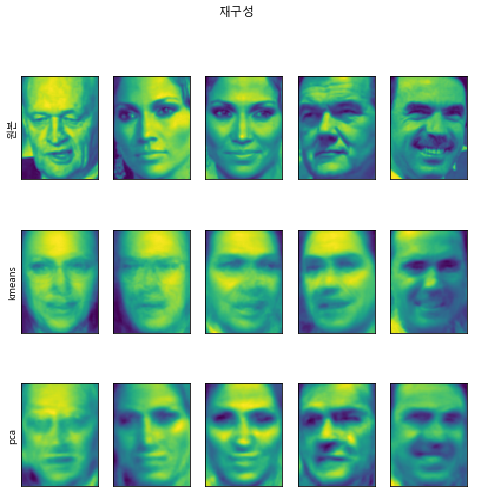

In [26]:
fig, axes = plt.subplots(3,5, 
                        subplot_kw={'xticks':(), 'yticks':()},
                        figsize=(8,8) )

fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))

axes[0,0].set_ylabel("원본")
axes[1,0].set_ylabel("kmeans")
axes[2,0].set_ylabel("pca")